In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
%matplotlib inline
import calendar
from pandas.api.types import CategoricalDtype

#https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting?resource=download

In [10]:
df = pd.read_csv("Data/cleanData.csv", index_col=0)

In [11]:
#Generate monthly averages graph
monthGroup = df.groupby(["year","month"]).mean()
monthGroup.reset_index(inplace=True)
monthGroup = monthGroup[monthGroup.year==2019]
def convertDate(x):
    return calendar.month_abbr[x]
monthGroup["month"] = monthGroup["month"].apply(convertDate)
orderedMonths = []
for i in range(1,13):
    orderedMonths.append(calendar.month_abbr[i])
ordering = CategoricalDtype(orderedMonths, ordered=False)
monthGroup["month"] = monthGroup["month"].astype(ordering)
ggsave(plot = ggplot(monthGroup) + aes(x="factor(month)", y="ActivePower") + geom_col() + labs(x = "Month of the Year", y="Average Active Power Output (kW)", title="Average Active Power Output by the Month in 2019"), filename="Monthly Power Output.png", path="./Plots/TimePlots")


/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./Plots/TimePlots/Monthly Power Output.png


/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./Plots/TimePlots/Daily Power Output January.png
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./Plots/TimePlots/Daily Power Output February.png
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./Plots/TimePlots/Daily Power Output March.png
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./Plots/TimePlots/Daily Power Output April.png
/usr/lib/python3.10/site-packages/plotnine/ggplot.py:719: P

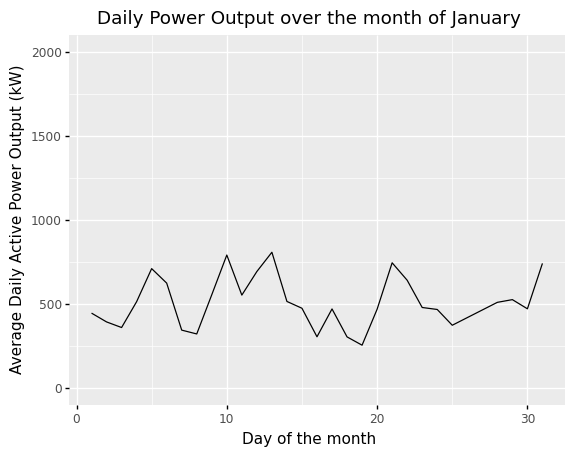

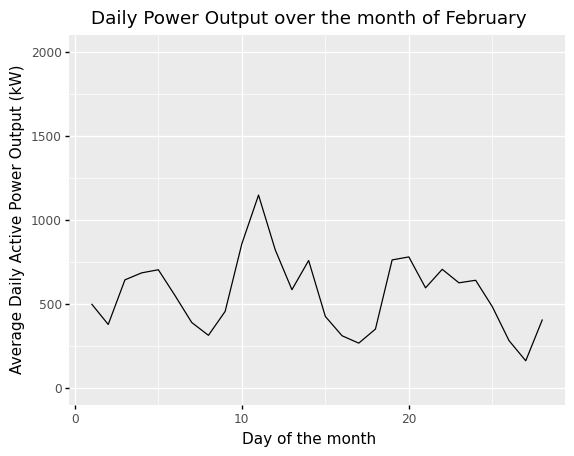

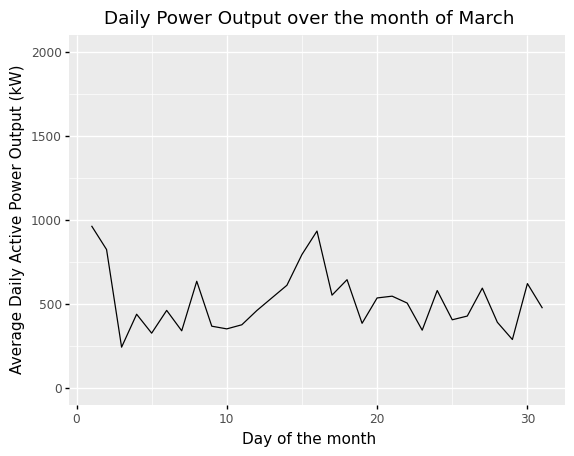

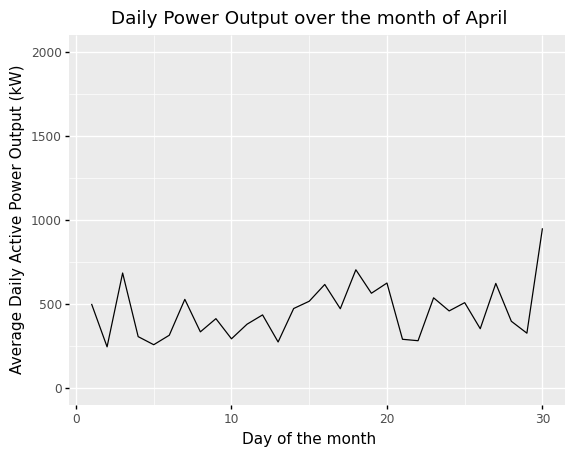

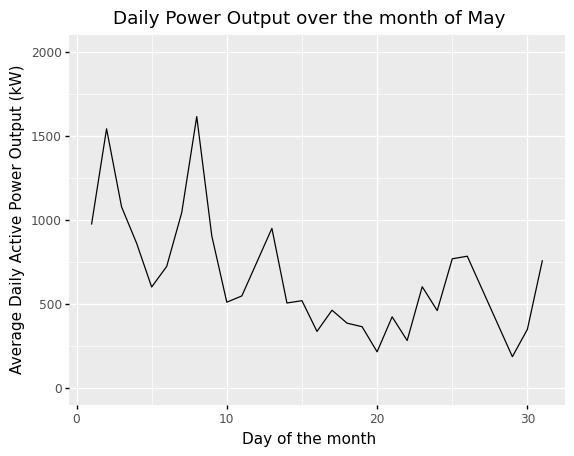

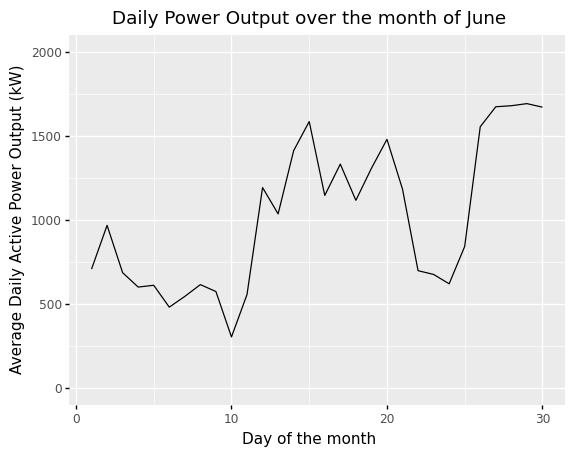

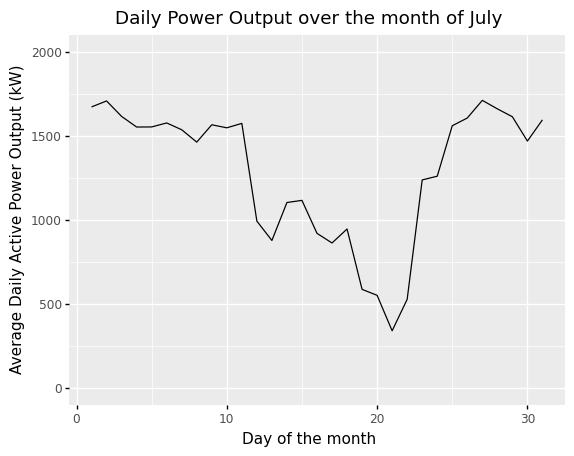

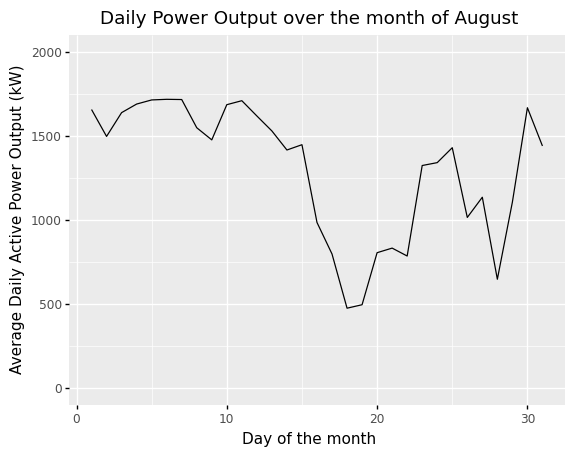

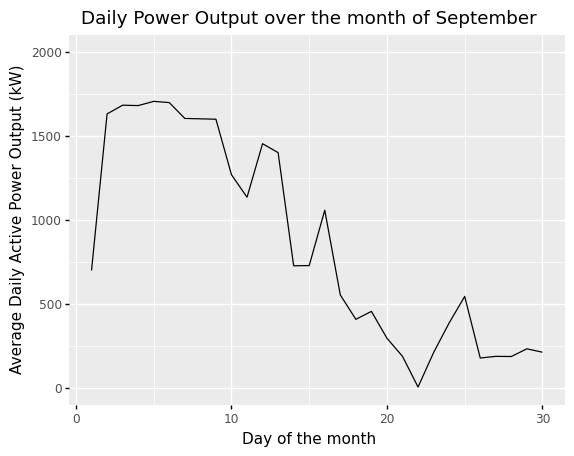

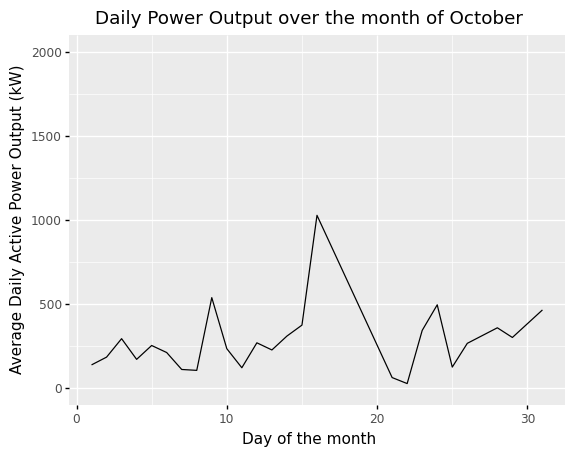

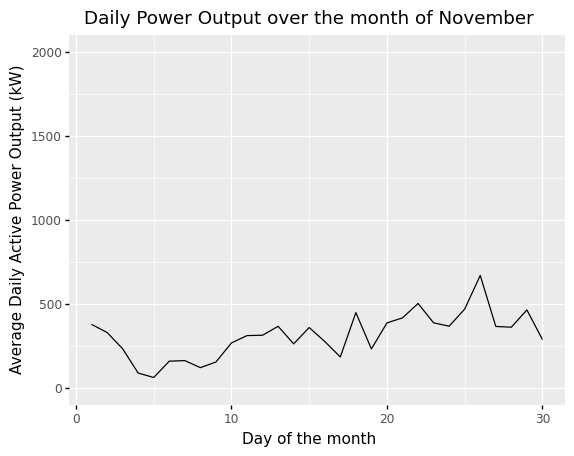

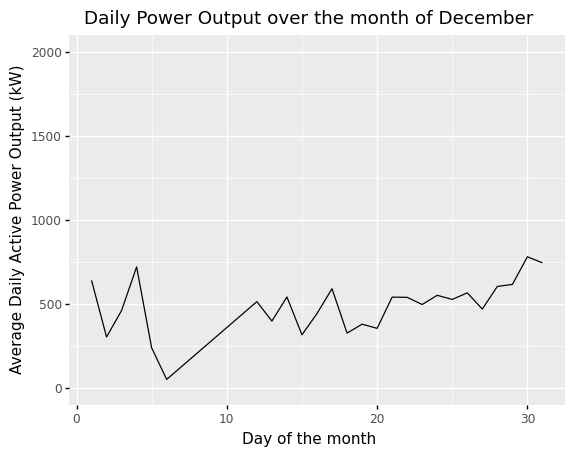

[<ggplot: (8779171287770)>,
 <ggplot: (8779172042533)>,
 <ggplot: (8779172274831)>,
 <ggplot: (8779171804860)>,
 <ggplot: (8779172578812)>,
 <ggplot: (8779172527759)>,
 <ggplot: (8779172591148)>,
 <ggplot: (8779172691614)>,
 <ggplot: (8779172579046)>,
 <ggplot: (8779172671750)>,
 <ggplot: (8779171862694)>,
 <ggplot: (8779171675677)>]

In [12]:
#Generate Monthly Line graphs for 2019
monthlyData = df.groupby(["year","month","day"])
monthlyData = monthlyData.mean()
monthlyData = monthlyData.reset_index()
#2019 has the best data so use that year
monthlyData = monthlyData[monthlyData.year==2019]
monthPlots = []
for i in range(1,13):
    p = (ggplot(monthlyData[monthlyData.month==i]) + aes(x='day', y='ActivePower') + geom_line() + ylim(0,2000) + labs(title = "Daily Power Output over the month of " + calendar.month_name[i], x="Day of the month", y="Average Daily Active Power Output (kW)"))
    ggsave(plot = p, filename="Daily Power Output " + calendar.month_name[i] + ".png", path="./Plots/TimePlots")
    monthPlots.append(p)
monthPlots